In [177]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings. filterwarnings('ignore')


In [178]:
df = pd.read_csv('heart.csv')
# Below further describe the variables and its factor (if applicable):

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age: Age of the patient in years

Sex: Sex of the patient:

M: Male
F: Femaledf.head()


ChestPainType: Chest pain type:

TA: Typical Angina
ATA: Atypical Angina
NAP: Non-Anginal Pain
ASY: Asymptomatic
RestingBP: Resting blood pressure in mm Hg

Cholesterol: Serum cholesterol in mm/dl

FastingBS: Fasting blood sugar:

1: If FastingBS > 120 mg/dl
0: Otherwise
RestingECG: Resting electrocardiogram results:

Normal: Normal
ST: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
LVH: Showing probable or definite left ventricular hypertrophy by Estes’ criteria] MaxHR: Maximum heart rate achieved (Numeric value between 60 and 200)

ExerciseAngina: Exercise-induced angina:

Y: Yes
N: No
Oldpeak: Oldpeak = ST (Numeric value measured in depression)

ST_Slope: The slope of the peak exercise ST segment:

Up: Upsloping
Flat: Flat
Down: Downsloping
HeartDisease: Output/target class:

1: Heart disease
0: Normal

In [179]:
df.shape

(918, 12)

In [180]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [182]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [183]:
df.Sex.value_counts()


Sex
M    725
F    193
Name: count, dtype: int64

In [184]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [185]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [186]:
df.ExerciseAngina.unique()


array(['N', 'Y'], dtype=object)

In [187]:
df.ST_Slope.unique()


array(['Up', 'Flat', 'Down'], dtype=object)

# data visualization

In [188]:
# Create a count plot 
def countPlot( col):
    plt.figure(figsize=(8, 6))
    plt.hist(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Distribution of '+ col)
    plt.show()
    

    
# Count the occurrences of each drug type
def piePlot(col):
    plt.figure(figsize=(8, 6))

    counts = df[ df.HeartDisease == 1 ][col].value_counts()
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    plt.title('Distribution of '+col)
    plt.axis('equal')   
    plt.show()




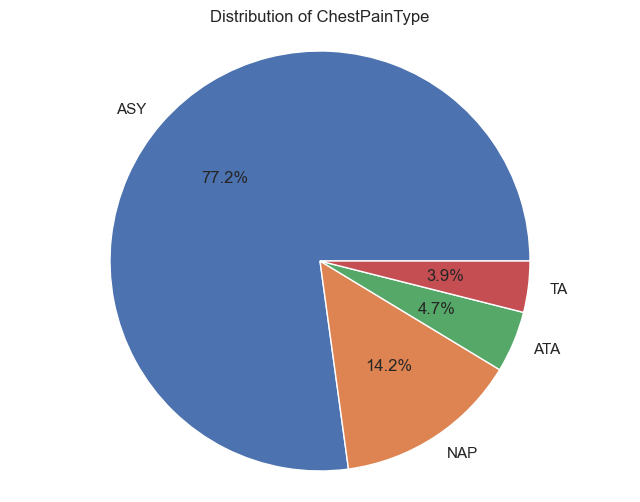

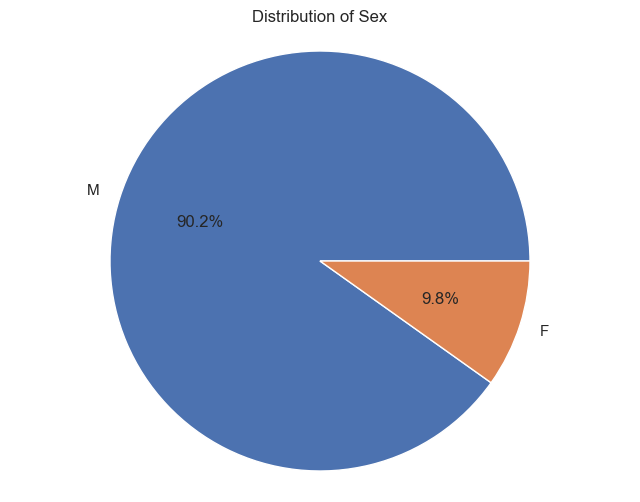

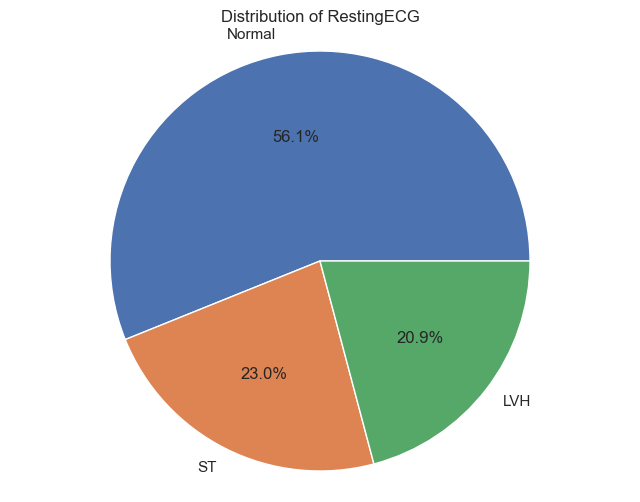

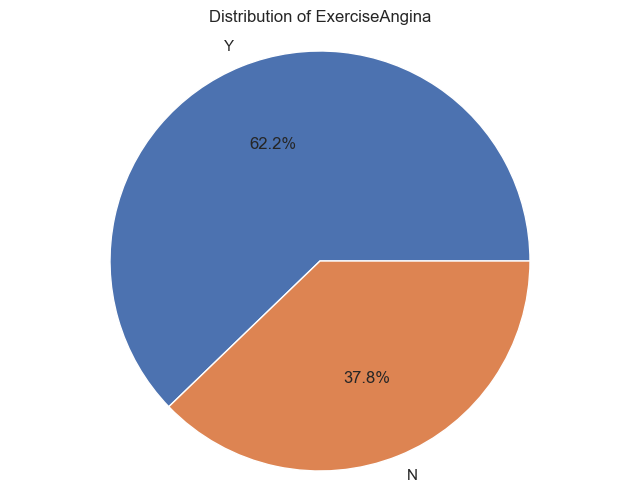

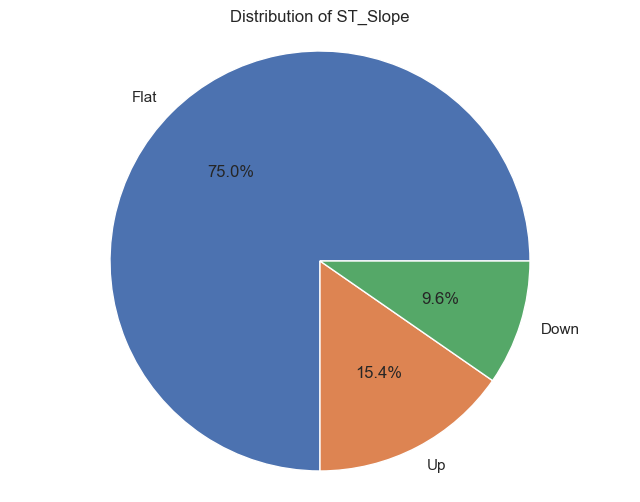

In [189]:
piePlot('ChestPainType')
piePlot('Sex')
piePlot('RestingECG')
piePlot('ExerciseAngina')
piePlot('ST_Slope')



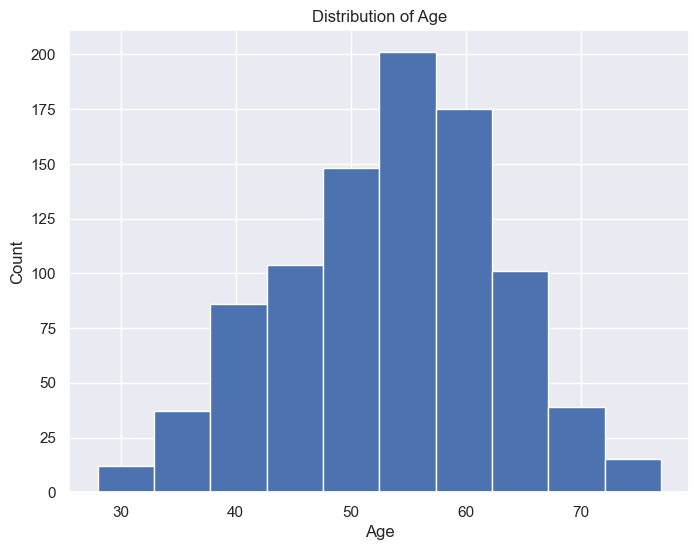

In [190]:
countPlot('Age')

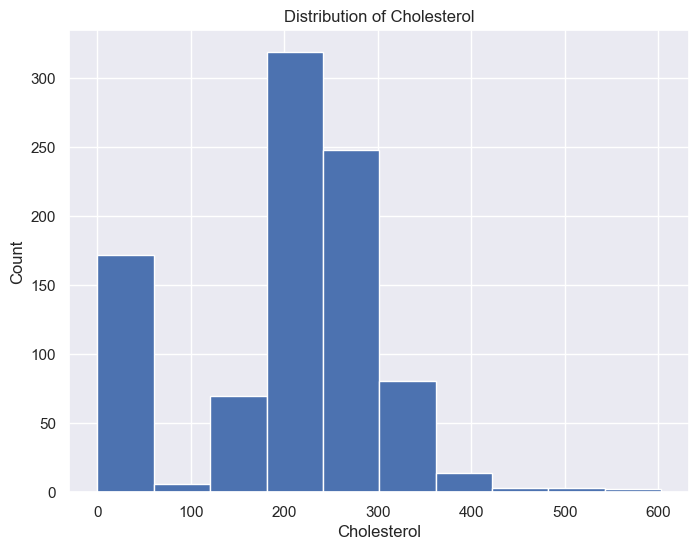

In [191]:
countPlot('Cholesterol')

In [192]:
# Create a count plot 
def scatterPlot( df1 , df2 , x , y):
    plt.figure(figsize=(8, 6))

    plt.scatter(df1[x] , df1[y] , color = 'green' , marker = '+')
    plt.scatter(df2[x] , df2[y] , color = 'red' , marker = '_')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

1. Age and Cholesterol

In [193]:
# df1 = df[df['HeartDisease'] == 1]
# df2 = df[df['HeartDisease'] == 0]


# scatterPlot(df1,df2,'Age' , 'RestingBP')


# Data Preprocessing

In [194]:
df_exclude_obj=df.select_dtypes(exclude=['object'])

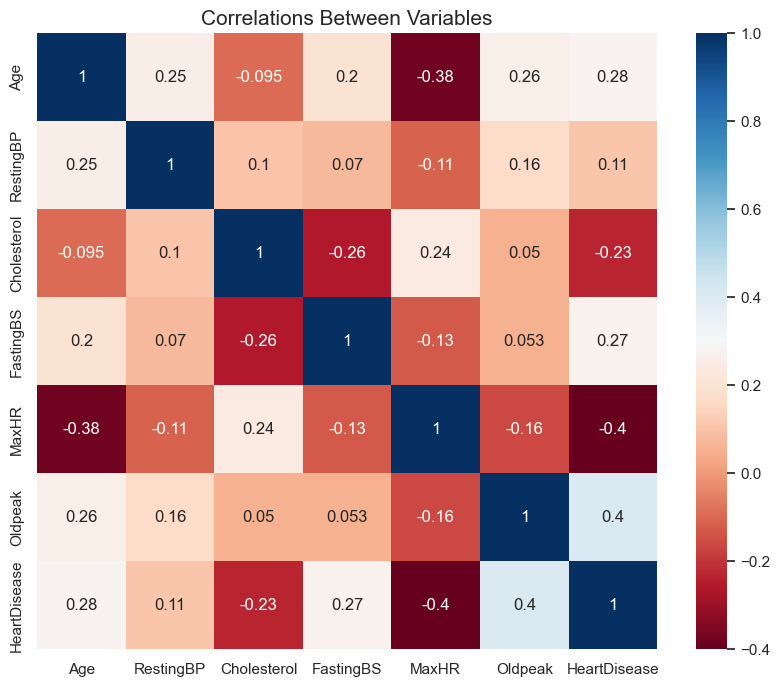

In [195]:
plt.figure(figsize=(10,8))
sns.heatmap(df_exclude_obj.corr(), cmap="RdBu" , annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

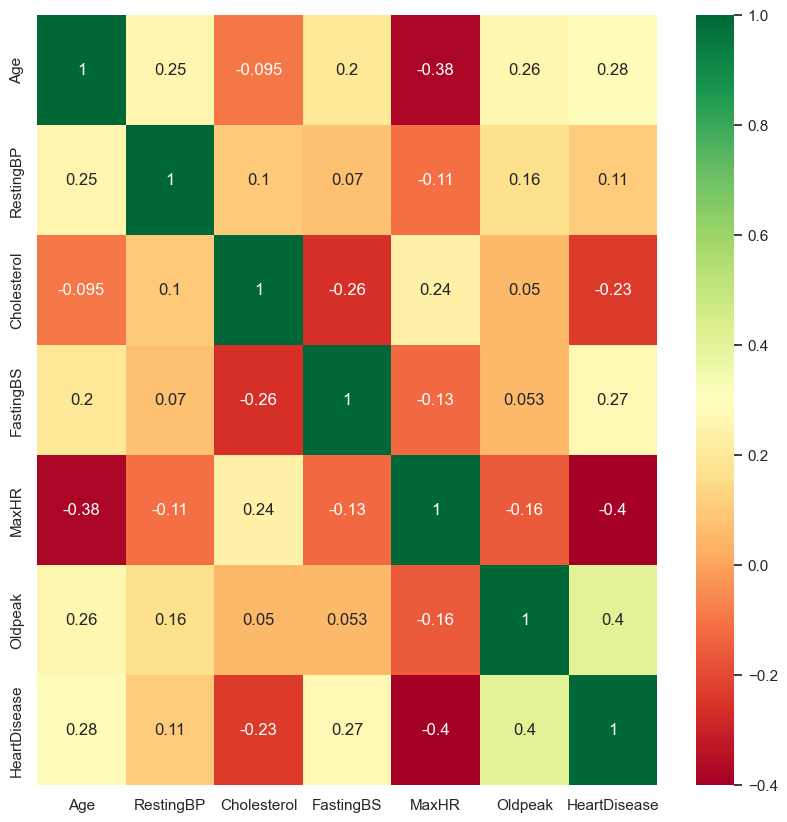

In [196]:
# Most correlated features

corrmat = df1.corr()
top_corr_features = corrmat.index[abs(corrmat["HeartDisease"])>0.5]
if len(top_corr_features) != 1:
    plt.figure(figsize=(10,10))
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    g = sns.heatmap(df_exclude_obj.corr(),annot=True,cmap="RdYlGn")
else:
    print('-'* 55,'\nThere are no correlation between features more than 50%')

In [197]:
# # Check outliers

# # Box plots for all our numeric features
# df_exclude_obj=df.select_dtypes(exclude=['object'])

# sns.set_style("white")
# f, ax = plt.subplots(figsize=(19, 19))
# # ax.set_xscale("log")
# ax = sns.boxplot(data=df_exclude_obj, orient="h", palette="Set2")
# # Tweak the visual presentation
# # ax.xaxis.grid(False)
# ax.set(ylabel="Feature names")
# ax.set(xlabel="Numeric values")
# ax.set(title="Numeric Distribution of Features")
# sns.despine(trim=True, left=True)

In [198]:
# # Pairplot

# sns.set()
# sns.pairplot(df_exclude_obj, size = 2.5)
# plt.show();

# Data Encoding

In [199]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

def handleLabelEncoding(col, custom_categories):

    return df[col].replace(custom_categories , inplace = True)
    
def handleNominalEncoding():
    # merged =df.copy()
    # for col in cols:
    #     dummies = pd.get_dummies(df[col] , prefix=col + "_" , drop_first=True )
    #     merged = pd.concat([merged , dummies] , axis=1 )
    #     merged.drop([col  ] , axis = 'columns' , inplace = True)
    # return merged
    return pd.get_dummies(df  , drop_first=True )


df1 = df.copy()

df1['ExerciseAngina'] = handleLabelEncoding(  'ExerciseAngina' , {'N' :0 , 'Y' : 1} )  
df1['ST_Slope'] = handleLabelEncoding(  'ST_Slope' ,  {'Down': 1,  'Flat': 2,  'Up': 3 } ) 
df1['RestingECG'] = handleLabelEncoding(  'RestingECG' ,  {'Normal': 1,'ST': 2, 'LVH': 3   } )  

df1 = handleNominalEncoding()
df1.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,1,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,0,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,1,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,0,True,False,True,False


# Treat Outliers

In [200]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,1.603486,136.809368,0.404139,0.887364,2.361656,0.553377
std,9.432617,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,2.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,3.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [201]:
# Remove outlier

categorical_df = df.select_dtypes(include='object')
numerical_df = df.select_dtypes(exclude='object')

# IQR
# Calculate the upper and lower limits

Q1 = numerical_df.quantile(0.1)
Q3 = numerical_df.quantile(0.9)
IQR = Q3 - Q1
idx = ~((numerical_df < round(Q1 - 1.5 * IQR)) | round(numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_df = pd.concat([numerical_df.loc[idx], categorical_df.loc[idx]], axis=1)

In [212]:
# using z-score = 3 ie( 3 std dev)

df2 = df1.copy()

def ZScoreOutlier(df , col , z):
    mean = df[col].mean()
    std = df[col].std()

    # idx = ~((numerical_df < round(Q1 - 1.5 * IQR)) | round(numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
    idx = ~((df[col] > (  mean  +  z * std  )) | (df[col] < (  mean  -  z * std  )))
    return df[idx][col]

# ZScoreOutlier(df1 , 'Cholesterol' , 3)
df2['Cholesterol'] =  ZScoreOutlier(df1 , 'Cholesterol' , 2)
df2['FastingBS'] =  ZScoreOutlier(df1 , 'FastingBS' , 3)
df2['MaxHR'] =  ZScoreOutlier(df1 , 'MaxHR' , 2)
df2['Oldpeak'] =  ZScoreOutlier(df1 , 'Oldpeak' , 2)

df2.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289.0,0,1,172.0,0,0.0,3,0,True,True,False,False
1,49,160,180.0,0,1,156.0,0,1.0,2,1,False,False,True,False
2,37,130,283.0,0,2,98.0,0,0.0,3,0,True,True,False,False
3,48,138,214.0,0,1,108.0,1,1.5,2,1,False,False,False,False
4,54,150,195.0,0,1,122.0,0,0.0,3,0,True,False,True,False


In [213]:
df3 =  df2.dropna()
df3.describe()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,53.411489,132.064478,197.852286,0.227433,1.593200,137.658851,0.400938,0.813482,2.395076,0.534584
std,9.360576,18.114965,104.526977,0.419420,0.800411,23.718610,0.490376,0.913523,0.587286,0.499095
min,28.000000,0.000000,0.000000,0.000000,1.000000,86.000000,0.000000,-1.100000,1.000000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,1.000000,120.000000,0.000000,0.000000,2.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,1.000000,138.000000,0.000000,0.500000,2.000000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,2.000000,156.000000,1.000000,1.500000,3.000000,1.000000
max,77.000000,200.000000,417.000000,1.000000,3.000000,186.000000,1.000000,3.000000,3.000000,1.000000


# Data Preprocessing

In [204]:
X = df1.drop('HeartDisease' , axis=1)
Y = df1['HeartDisease']

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled[:3]

array([[-1.4331398 ,  0.41090889,  0.82507026, -0.55134134, -0.74917967,
         1.38292822, -0.8235563 , -0.83243239,  1.05211381,  0.51595242,
         2.07517671, -0.53283777, -0.22967867],
       [-0.47848359,  1.49175234, -0.17196105, -0.55134134, -0.74917967,
         0.75415714, -0.8235563 ,  0.10566353, -0.59607813, -1.93816322,
        -0.48188667,  1.87674385, -0.22967867],
       [-1.75135854, -0.12951283,  0.7701878 , -0.55134134,  0.49224079,
        -1.52513802, -0.8235563 , -0.83243239,  1.05211381,  0.51595242,
         2.07517671, -0.53283777, -0.22967867]])

# Train using stand alone model

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


svc_score = cross_val_score(SVC(), x_scaled , Y , cv=5)
dt_score = cross_val_score(DecisionTreeClassifier(), x_scaled , Y , cv=5)




0.7286528866714184

In [217]:
svc_score.mean() , dt_score.mean()


(0.811463530529817, 0.7286528866714184)

# Train using Bagging

In [218]:
from sklearn.ensemble import  BaggingClassifier

In [219]:
svc_bag_model = BaggingClassifier(
    base_estimator = SVC() ,
    n_estimators = 100 , 
    max_samples  = 0.8 , 
    oob_score = True ,
    random_state = 0 
)
dt_bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier() ,
    n_estimators = 100 , 
    max_samples  = 0.8 , 
    oob_score = True ,
    random_state = 0 
)

In [220]:
scores = cross_val_score(svc_bag_model, x_scaled, Y, cv=5)
scores.mean()

0.8125623663578047

In [221]:
scores = cross_val_score(dt_bag_model, x_scaled, Y, cv=5)
scores.mean()

0.7918507959135186

In [222]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), x_scaled, Y,  cv=5)
scores.mean()

0.8234675694939415